In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_excel('Sales.xlsx',sheet_name='Sales')

In [3]:
orig = df.copy()

In [4]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [5]:
df['AgentBonus'].mean()

4077.838274336283

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [8]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(4520, 20)

In [11]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [12]:
# Datatypes are fine

In [13]:
print(df.Age.unique())

[22. 11. 26.  6.  7. 12.  8. 20. 18. 10.  9.  5. nan 30. 14. 16. 13.  2.
  4. 15. 27. 23. 37. 33. 19. 17. 25. 21. 24. 29. 47. 31. 28.  3. 46. 40.
 51. 35. 32. 34. 42. 39. 38. 41. 52. 36. 43. 50. 44. 53. 58. 54. 57. 48.]


## EDA

### Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

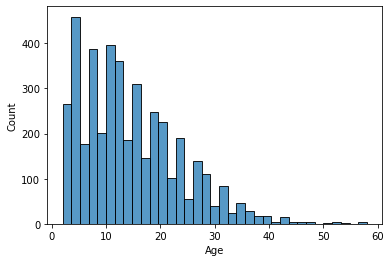

In [13]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Age'>

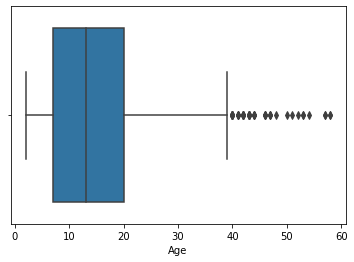

In [14]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='CustTenure', ylabel='Count'>

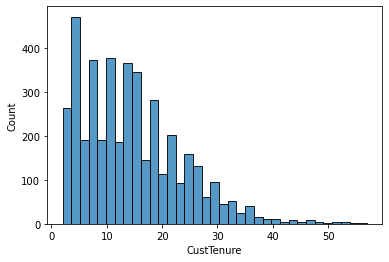

In [15]:
sns.histplot(df['CustTenure'])

<AxesSubplot:xlabel='CustTenure'>

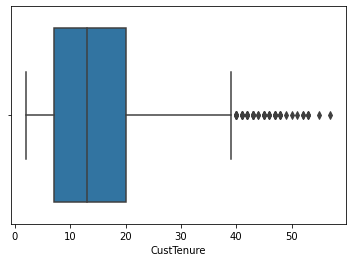

In [16]:
sns.boxplot(df['CustTenure'])

In [8]:
df['Gender'] = df['Gender'].replace('Fe male','Female')

<AxesSubplot:xlabel='Gender', ylabel='count'>

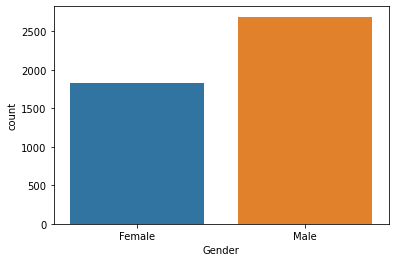

In [18]:
sns.countplot(df['Gender'])

In [9]:
df['Occupation'] = df['Occupation'].replace('Laarge Business','Large Business')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Salaried'),
  Text(1, 0, 'Free Lancer'),
  Text(2, 0, 'Small Business'),
  Text(3, 0, 'Large Business')])

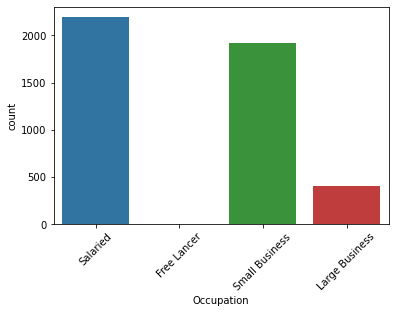

In [20]:
sns.countplot(df['Occupation'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='ExistingProdType', ylabel='count'>

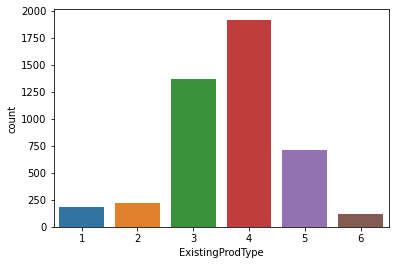

In [21]:
sns.countplot(df['ExistingProdType'])

<AxesSubplot:xlabel='AgentBonus', ylabel='Count'>

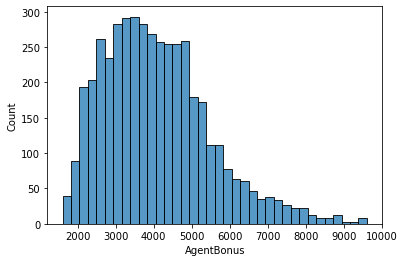

In [22]:
sns.histplot(df['AgentBonus'])

<AxesSubplot:xlabel='AgentBonus'>

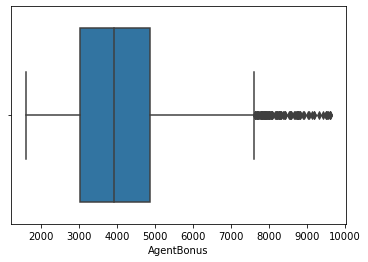

In [23]:
sns.boxplot(df['AgentBonus'])

<AxesSubplot:xlabel='Channel', ylabel='count'>

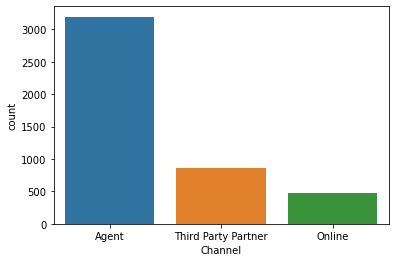

In [24]:
sns.countplot(df['Channel'])

In [10]:
df['EducationField'] = df['EducationField'].replace('UG','Under Graduate')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Graduate'),
  Text(1, 0, 'Post Graduate'),
  Text(2, 0, 'Under Graduate'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'Diploma'),
  Text(5, 0, 'MBA')])

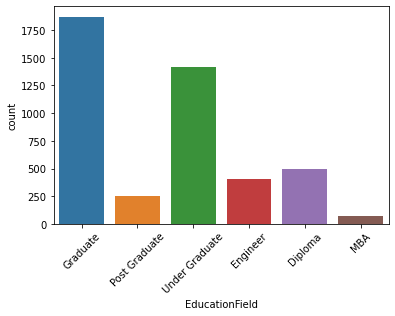

In [26]:
sns.countplot(df['EducationField'])
plt.xticks(rotation=45)

In [11]:
df['Designation'] = df['Designation'].replace('Exe','Executive')

<AxesSubplot:xlabel='Designation', ylabel='count'>

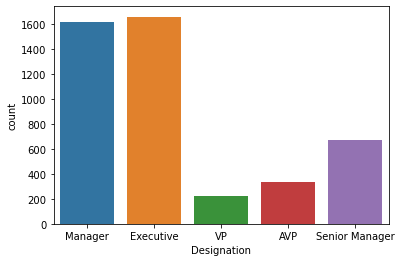

In [28]:
sns.countplot(df['Designation'])

<AxesSubplot:xlabel='NumberOfPolicy', ylabel='count'>

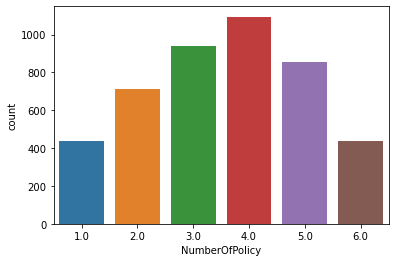

In [29]:
sns.countplot(df['NumberOfPolicy'])

In [12]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried').replace('Divorced','Unmarried')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

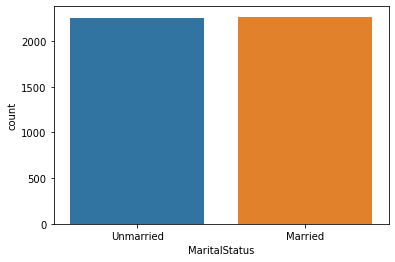

In [31]:
sns.countplot(df['MaritalStatus'])

<AxesSubplot:xlabel='SumAssured', ylabel='Count'>

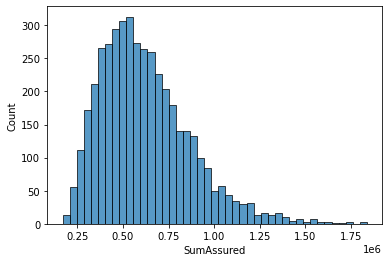

In [35]:
sns.histplot(df['SumAssured'])

<AxesSubplot:xlabel='Zone', ylabel='count'>

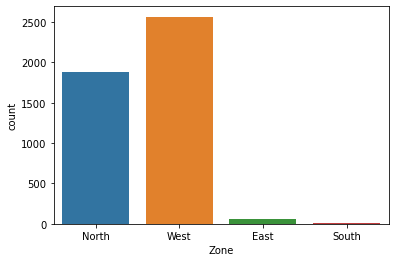

In [36]:
sns.countplot(df['Zone'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

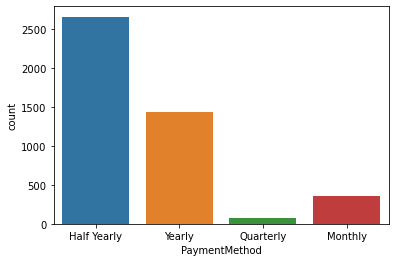

In [37]:
sns.countplot(df['PaymentMethod'])

In [37]:
#df.to_excel('Sales_Cleaned_Columns.xlsx',index=False)

### Bivariate / Multivariate Analysis

<AxesSubplot:xlabel='Zone', ylabel='AgentBonus'>

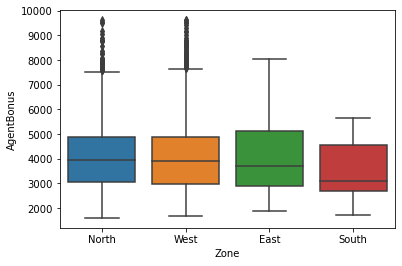

In [39]:
sns.boxplot(df['Zone'], df['AgentBonus'])

<AxesSubplot:xlabel='Designation', ylabel='AgentBonus'>

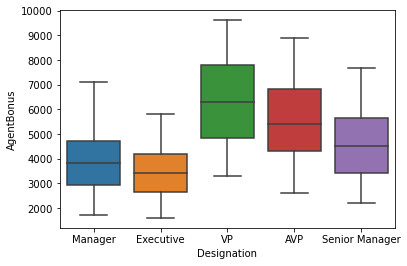

In [41]:
sns.boxplot(df['Designation'], df['AgentBonus'])

<AxesSubplot:xlabel='Channel', ylabel='AgentBonus'>

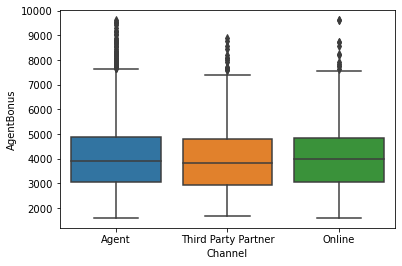

In [42]:
sns.boxplot(df['Channel'], df['AgentBonus'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='AgentBonus'>

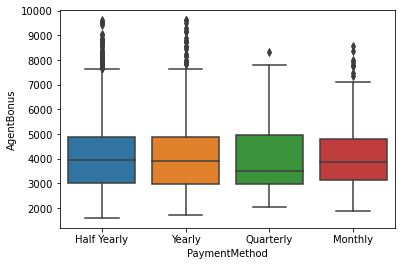

In [43]:
sns.boxplot(df['PaymentMethod'], df['AgentBonus'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='AgentBonus'>

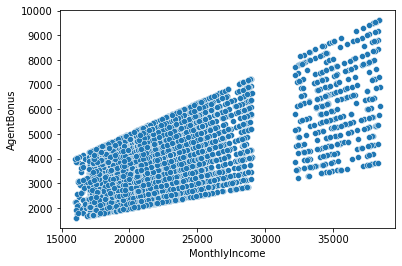

In [44]:
sns.scatterplot(df['MonthlyIncome'],df['AgentBonus'])

<AxesSubplot:xlabel='SumAssured', ylabel='AgentBonus'>

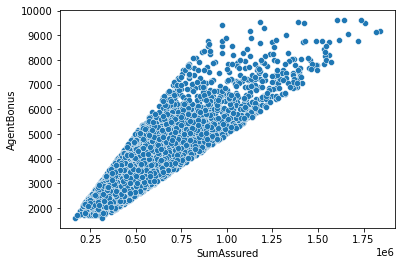

In [45]:
sns.scatterplot(df['SumAssured'],df['AgentBonus'])

<AxesSubplot:xlabel='Age', ylabel='SumAssured'>

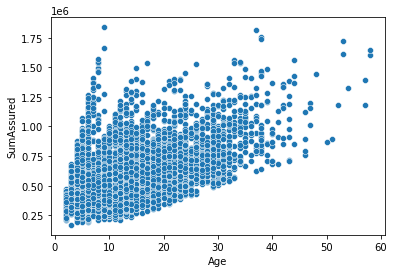

In [19]:
sns.scatterplot(df['Age'],df['SumAssured'])

<AxesSubplot:xlabel='Occupation', ylabel='AgentBonus'>

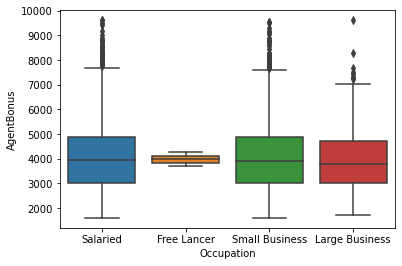

In [48]:
sns.boxplot(df['Occupation'],df['AgentBonus'])

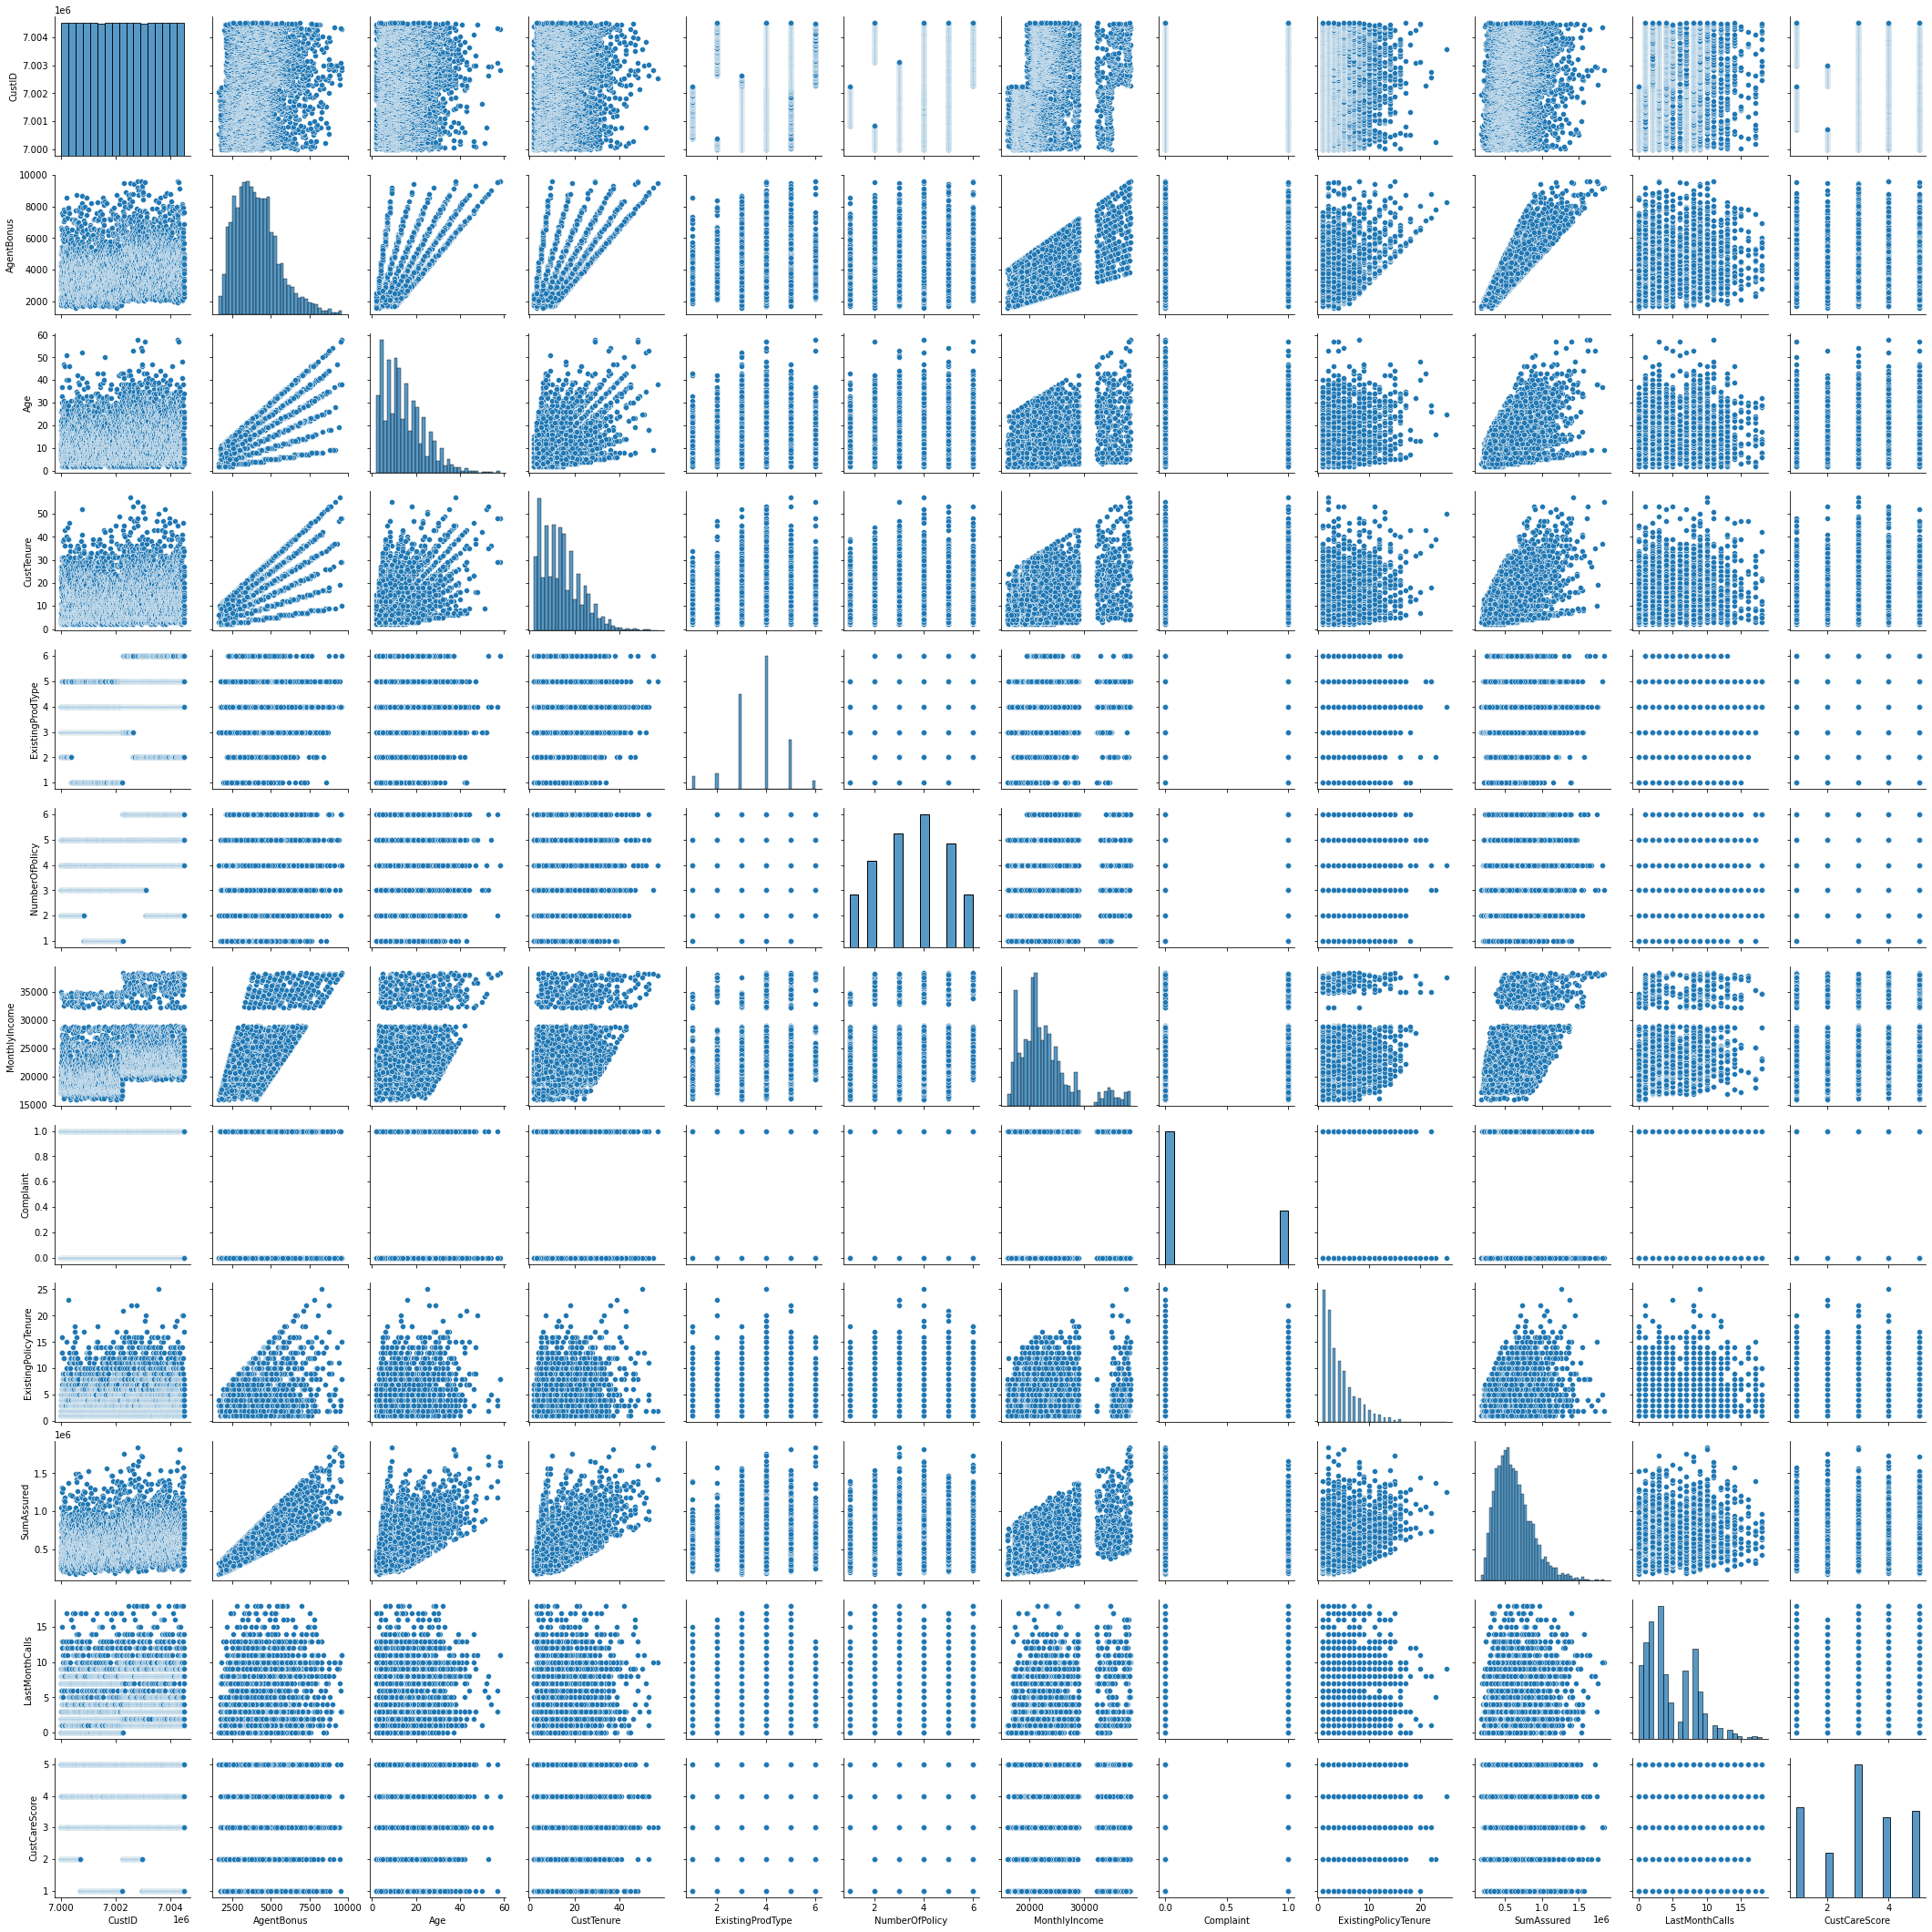

In [49]:
sns.pairplot(df)

<AxesSubplot:xlabel='Designation', ylabel='AgentBonus'>

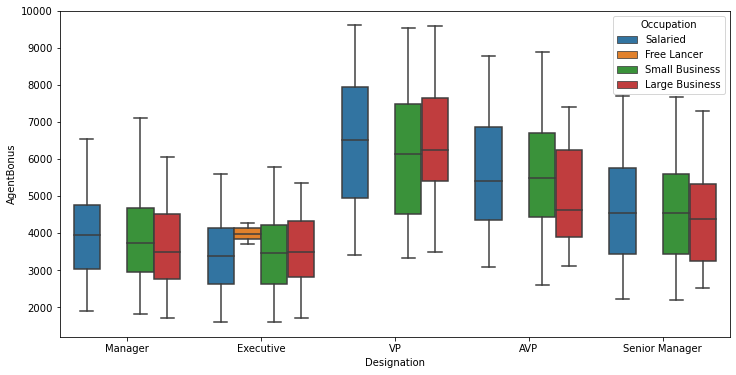

In [50]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Designation', y='AgentBonus', hue='Occupation',data=df)

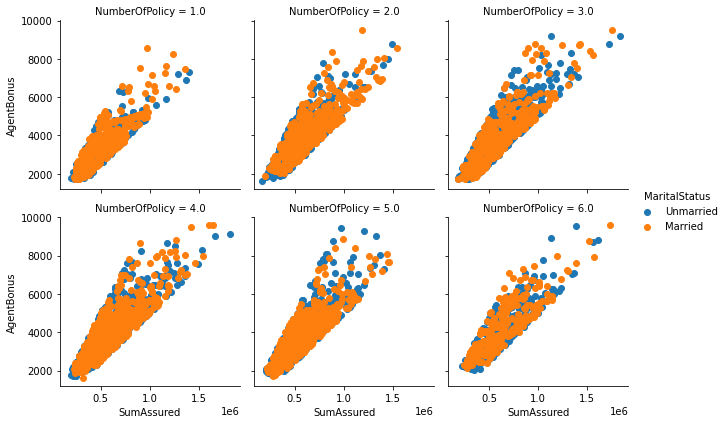

In [51]:
g = sns.FacetGrid(df, col="NumberOfPolicy", hue='MaritalStatus',col_wrap=3, height=3)
g = g.map(plt.scatter,'SumAssured',"AgentBonus")
g.add_legend()

<AxesSubplot:>

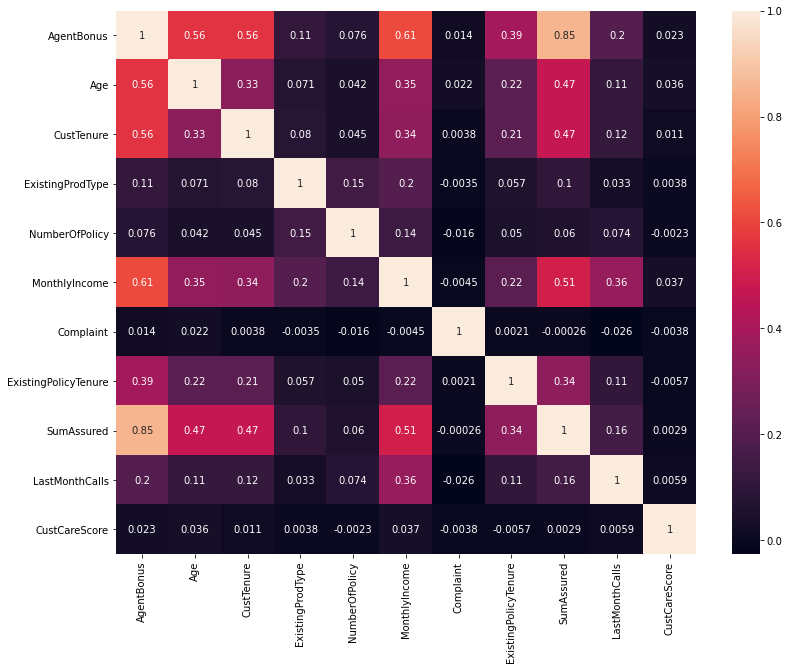

In [21]:
plt.figure(figsize=(13,10))
sns.heatmap(df.drop('CustID',axis=1).corr(),annot=True)

In [20]:
df3 = df.copy()

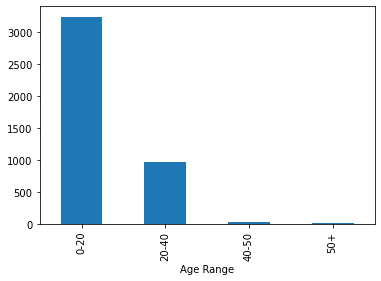

In [23]:
price_range = pd.cut(df["Age"], 
                     bins=[0, 20, 40, 50, df["Age"].max()], 
                     labels=["0-20", "20-40", "40-50", "50+"])
df3["Age_Range"] = price_range 
df3["Age_Range"].value_counts().sort_index().plot(kind="bar")
plt.xlabel('Age Range')
plt.show()

<AxesSubplot:xlabel='Age_Range', ylabel='SumAssured'>

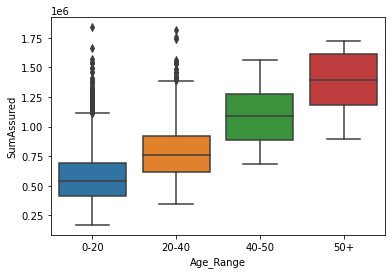

In [22]:
sns.boxplot(df3['Age_Range'],df3['SumAssured'])

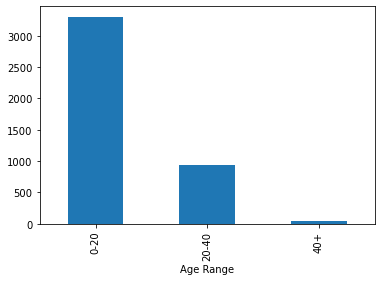

In [24]:
tenure_range = pd.cut(df3["CustTenure"], 
                     bins=[0, 20, 40, df["CustTenure"].max()], 
                     labels=["0-20", "20-40", "40+"])
df3["tenure_range"] = tenure_range 
df3["tenure_range"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Age Range")
plt.show()

<AxesSubplot:xlabel='tenure_range', ylabel='SumAssured'>

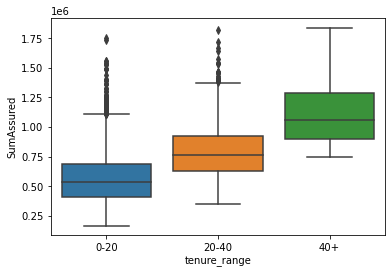

In [25]:
sns.boxplot(df3['tenure_range'],df3['SumAssured'])

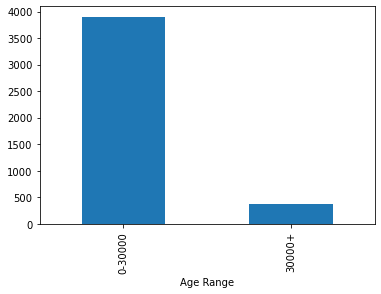

In [26]:
income_range = pd.cut(df3["MonthlyIncome"], 
                     bins=[0, 30000, df["MonthlyIncome"].max()], 
                     labels=["0-30000", "30000+"])
df3["income_range"] = income_range 
df3["income_range"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Age Range")
plt.show()

<AxesSubplot:xlabel='income_range', ylabel='SumAssured'>

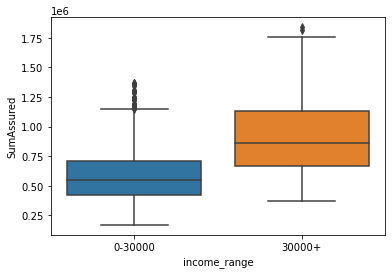

In [27]:
sns.boxplot(df3['income_range'],df3['SumAssured'])

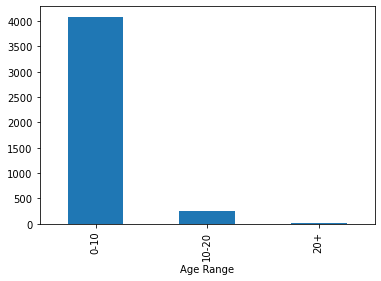

In [29]:
policy_range = pd.cut(df3["ExistingPolicyTenure"], 
                     bins=[0, 10, 20, df["ExistingPolicyTenure"].max()], 
                     labels=["0-10", "10-20", "20+"])
df3["policy_range"] = policy_range 
df3["policy_range"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Age Range")
plt.show()

<AxesSubplot:xlabel='policy_range', ylabel='SumAssured'>

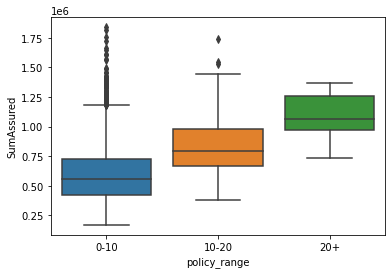

In [60]:
sns.boxplot(df3['policy_range'],df3['SumAssured'])

In [13]:
df.drop('CustID',axis=1,inplace=True)

### Imputing missing data

In [18]:
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [15]:
missing_value_df.sort_values(by='percent_missing',ascending=False)

,column_name,percent_missing
Age,Age,5.951327
MonthlyIncome,MonthlyIncome,5.221239
CustTenure,CustTenure,5.000000
ExistingPolicyTenure,ExistingPolicyTenure,4.070796
SumAssured,SumAssured,3.407080
CustCareScore,CustCareScore,1.150442
NumberOfPolicy,NumberOfPolicy,0.995575
ExistingProdType,ExistingProdType,0.000000
Designation,Designation,0.000000
Gender,Gender,0.000000


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
SC = SimpleImputer(missing_values = np.nan,strategy='median')

In [20]:
SC = SC.fit(df[['Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured']])

In [21]:
df[['Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured']] = SC.transform(df[['Age','CustTenure','MonthlyIncome','ExistingPolicyTenure','SumAssured']])

In [22]:
SC = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
SC = SC.fit(df[['NumberOfPolicy','CustCareScore']])

In [23]:
df[['NumberOfPolicy','CustCareScore']] = SC.transform(df[['NumberOfPolicy','CustCareScore']])

In [24]:
df.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

### Outlier Treatment

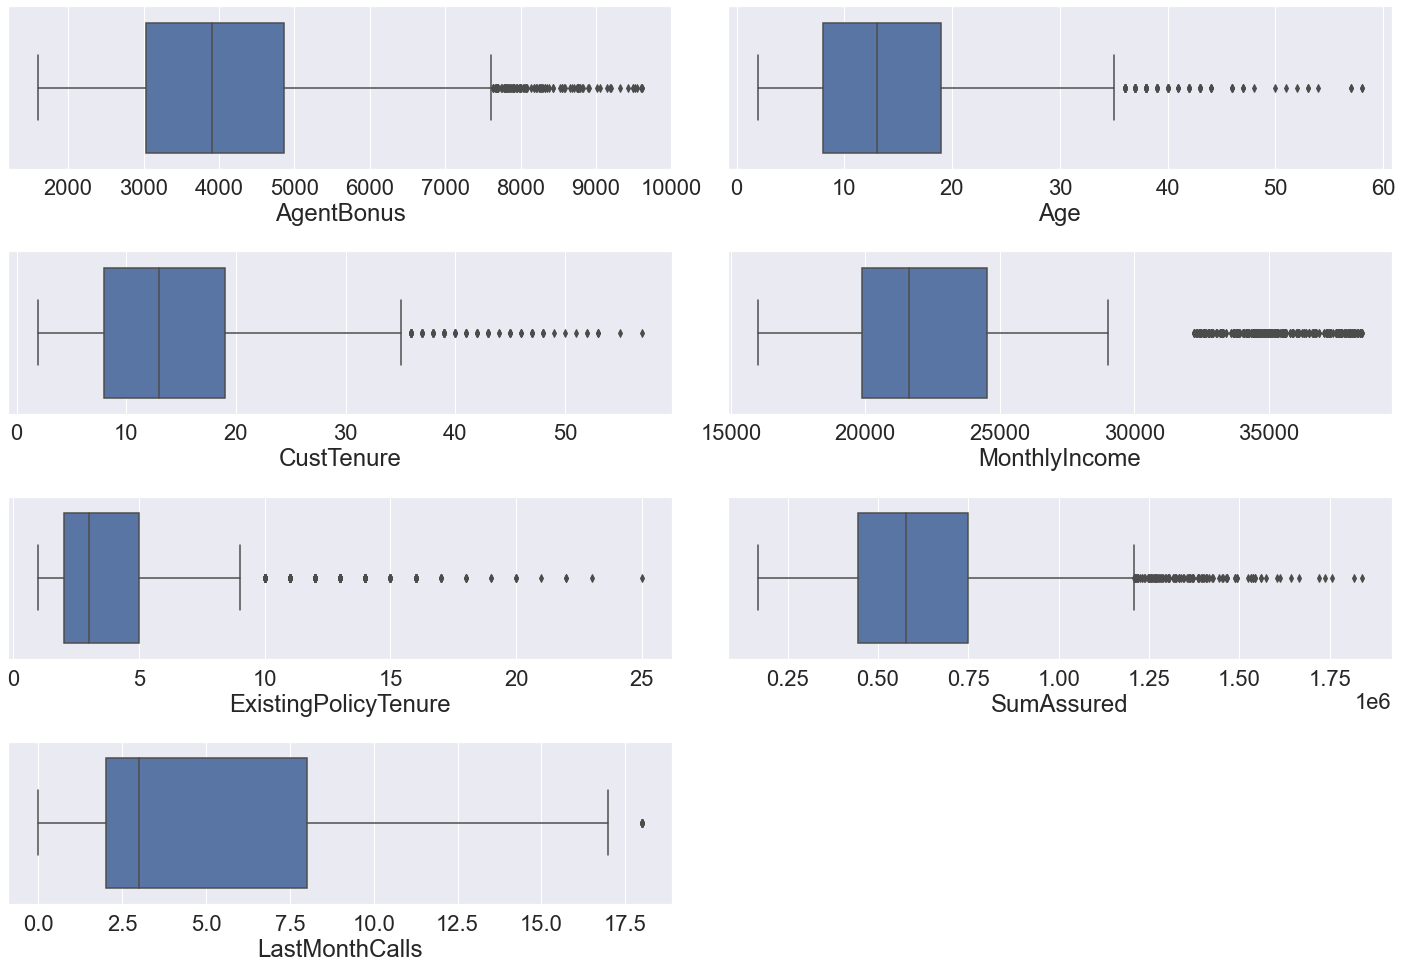

In [48]:
data_plot=df[['AgentBonus', 'Age', 'CustTenure','MonthlyIncome','ExistingPolicyTenure', 'SumAssured','LastMonthCalls']]
sns.set(font_scale = 2)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [25]:
cont=['AgentBonus', 'Age', 'CustTenure','MonthlyIncome','ExistingPolicyTenure', 'SumAssured','LastMonthCalls']

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

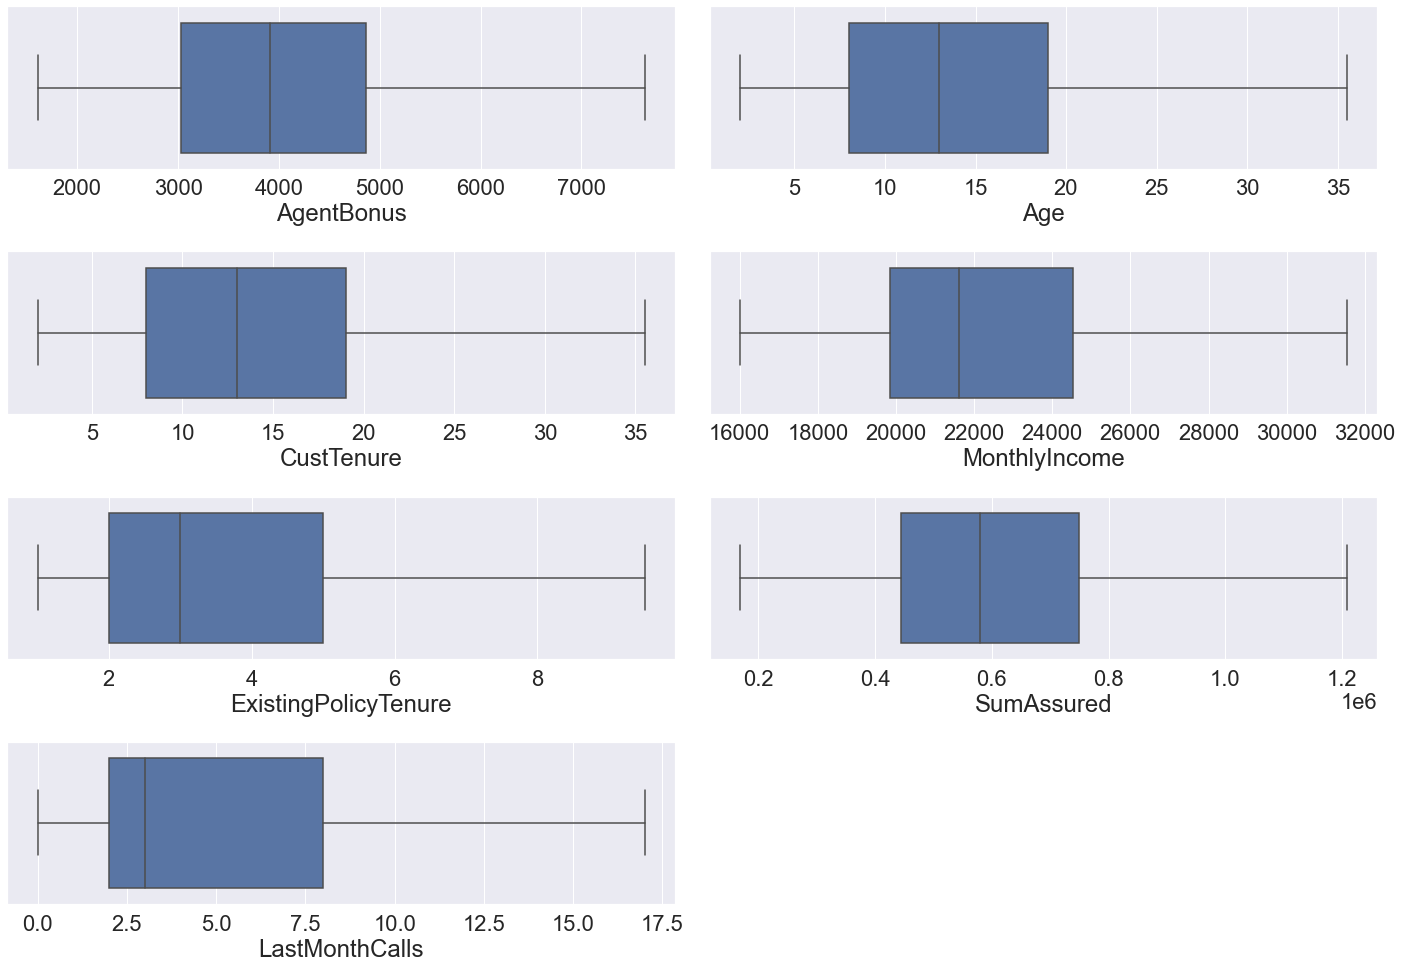

In [52]:
data_plot=df[['AgentBonus', 'Age', 'CustTenure','MonthlyIncome','ExistingPolicyTenure', 'SumAssured','LastMonthCalls']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [37]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Unmarried,20993.0,1,2.0,806761.0,North,Half Yearly,5.0,2.0
1,2214.0,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Unmarried,20130.0,0,3.0,294502.0,North,Yearly,7.0,3.0
2,4273.0,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,578976.5,North,Yearly,0.0,3.0
3,1791.0,11.0,13.0,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Unmarried,17909.0,1,2.0,268635.0,West,Half Yearly,0.0,5.0
4,2955.0,6.0,13.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Unmarried,18468.0,0,4.0,366405.0,West,Half Yearly,2.0,5.0


In [28]:
cleaned_data = df.copy()

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
df = pd.get_dummies(df,drop_first=True)

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409.0,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,5.0,2.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
1,2214.0,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,7.0,3.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1
2,4273.0,26.0,4.0,4,3.0,17090.0,1,2.0,578976.5,0.0,3.0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1
3,1791.0,11.0,13.0,3,3.0,17909.0,1,2.0,268635.0,0.0,5.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,2955.0,6.0,13.0,3,4.0,18468.0,0,4.0,366405.0,2.0,5.0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953.0,4.0,8.0,4,2.0,26355.0,0,2.0,636473.0,9.0,1.0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
4516,2939.0,9.0,9.0,2,2.0,20991.0,0,3.0,296813.0,1.0,3.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
4517,3792.0,23.0,23.0,5,5.0,21606.0,0,2.0,667371.0,4.0,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4518,4816.0,10.0,10.0,4,2.0,20068.0,0,6.0,943999.0,1.0,5.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


### Train test split and Scaling

In [33]:
X = df.drop('AgentBonus', axis=1)

y = df[['AgentBonus']]

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [36]:
scaled_X = sc_X.fit_transform(X[['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy','MonthlyIncome','ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls','CustCareScore']])

In [37]:
scaled_y = sc_y.fit_transform(y)

In [38]:
scaled_X = pd.DataFrame(scaled_X,columns=['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy','MonthlyIncome','ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls','CustCareScore'])

In [39]:
scaled_y = pd.DataFrame(scaled_y,columns=['AgentBonus'])

In [40]:
scaled_X

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,0.922528,-1.231573,-0.678318,-1.083186,-0.383025,-0.692870,0.838355,0.104054,-0.775947
1,-0.391386,-1.471557,0.306267,0.296941,-0.601358,-0.321124,-1.395405,0.658028,-0.048597
2,1.400315,-1.231573,0.306267,-0.393123,-1.370456,-0.692870,-0.154924,-1.280881,-0.048597
3,-0.391386,-0.151649,-0.678318,-0.393123,-1.163255,-0.692870,-1.508201,-1.280881,1.406102
4,-0.988620,-0.151649,-0.678318,0.296941,-1.021832,0.050622,-1.081865,-0.726907,1.406102
...,...,...,...,...,...,...,...,...,...
4515,-1.227514,-0.751607,0.306267,-1.083186,0.973523,-0.692870,0.095796,1.212002,-1.503296
4516,-0.630280,-0.631615,-1.662902,-1.083186,-0.383531,-0.321124,-1.385328,-1.003894,-0.048597
4517,1.041975,1.048268,1.290851,0.987005,-0.227940,-0.692870,0.230530,-0.172933,-1.503296
4518,-0.510833,-0.511624,0.306267,-1.083186,-0.617044,0.794113,1.436796,-1.003894,1.406102


In [41]:
scaled_y

,AgentBonus
0,0.254928
1,-1.361260
2,0.154790
3,-1.672717
4,-0.815659
...,...
4515,-0.080827
4516,-0.827439
4517,-0.199372
4518,0.554604


In [42]:
copy = df.copy()

In [43]:
copy.drop(['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy','MonthlyIncome','ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls','CustCareScore'],axis=1,inplace=True)

In [44]:
X = pd.concat([copy,scaled_X],axis=1)

In [45]:
X

,Complaint,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0.922528,-1.231573,-0.678318,-1.083186,-0.383025,-0.692870,0.838355,0.104054,-0.775947
1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,-0.391386,-1.471557,0.306267,0.296941,-0.601358,-0.321124,-1.395405,0.658028,-0.048597
2,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1.400315,-1.231573,0.306267,-0.393123,-1.370456,-0.692870,-0.154924,-1.280881,-0.048597
3,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,-0.391386,-0.151649,-0.678318,-0.393123,-1.163255,-0.692870,-1.508201,-1.280881,1.406102
4,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,-0.988620,-0.151649,-0.678318,0.296941,-1.021832,0.050622,-1.081865,-0.726907,1.406102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,-1.227514,-0.751607,0.306267,-1.083186,0.973523,-0.692870,0.095796,1.212002,-1.503296
4516,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,-0.630280,-0.631615,-1.662902,-1.083186,-0.383531,-0.321124,-1.385328,-1.003894,-0.048597
4517,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.041975,1.048268,1.290851,0.987005,-0.227940,-0.692870,0.230530,-0.172933,-1.503296
4518,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,-0.510833,-0.511624,0.306267,-1.083186,-0.617044,0.794113,1.436796,-1.003894,1.406102


In [46]:
y = scaled_y

In [47]:
y

,AgentBonus
0,0.254928
1,-1.361260
2,0.154790
3,-1.672717
4,-0.815659
...,...
4515,-0.080827
4516,-0.827439
4517,-0.199372
4518,0.554604


In [48]:
X.describe()

,Complaint,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03
mean,0.287168,0.103540,0.189823,0.090265,0.484956,0.424336,0.090265,0.413717,0.016372,0.055752,0.314159,0.594690,0.367699,0.358407,0.149558,0.050000,0.498230,0.416814,0.001327,0.567699,0.078319,0.016814,0.317257,-1.154098e-16,7.707699e-17,8.300636e-16,2.332844e-15,1.318881e-16,1.478856e-15,5.686331e-16,-2.323608e-16,-1.607151e-15
std,0.452491,0.304696,0.392204,0.286593,0.499829,0.494297,0.286593,0.492553,0.126914,0.229468,0.464232,0.491006,0.482232,0.479586,0.356677,0.217969,0.500052,0.493086,0.036414,0.495450,0.268702,0.128589,0.465460,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.466407e+00,-1.471557e+00,-2.647486e+00,-1.773250e+00,-1.643942e+00,-1.064616e+00,-1.944694e+00,-1.280881e+00,-1.503296e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.497266e-01,-7.516069e-01,-6.783177e-01,-1.083186e+00,-6.701721e-01,-6.928699e-01,-7.414267e-01,-7.269072e-01,-7.759467e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.524928e-01,-1.516487e-01,3.062667e-01,2.969412e-01,-2.279405e-01,-3.211241e-01,-1.549240e-01,-4.499202e-01,-4.859724e-02
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.641877e-01,5.683011e-01,3.062667e-01,9.870050e-01,5.122535e-01,4.223673e-01,5.908881e-01,9.350152e-01,6.787522e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.535059e+00,2.548163e+00,2.275436e+00,1.677069e+00,2.285892e+00,2.095223e+00,2.589360e+00,3.427899e+00,1.406102e+00


In [49]:
y.describe()

,AgentBonus
count,4.520000e+03
mean,5.082709e-16
std,1.000111e+00
min,-1.809669e+00
25%,-7.620925e-01
50%,-1.113836e-01
75%,5.923392e-01
max,2.623987e+00


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Modeling

### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [63]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [64]:
regression_model.score(X_train, y_train)

0.8039104087403923

In [65]:
regression_model.score(X_test, y_test)

0.7913654061492285

In [66]:
# Adjusted R Squared on Training   (1 is better)
1 - (1-regression_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.8018430104938853

In [67]:
# Adjusted R Squared on Test   (1 is better)
1 - (1-regression_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7861574321726207

In [68]:
y_pred = regression_model.predict(X_test)

In [69]:
y_predt = regression_model.predict(X_train)

In [70]:
from sklearn import metrics

In [71]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(y_train, y_predt, squared=False)

0.442931885448497

In [72]:
#RMSE test- smaller the value, better
metrics.mean_squared_error(y_test, y_pred, squared=False)

0.45648086313002784

In [52]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [74]:
# MAPE train - Smaller the value, better
MAPE(y_train,y_predt)

AgentBonus    183.28712
dtype: float64

In [75]:
# MAPE test - Smaller the value, better
MAPE(y_test,y_pred)

AgentBonus    503.29445
dtype: float64

In [77]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(regression_model.coef_))], axis = 1)

In [78]:
coefficients

,0,0
0,Complaint,0.025353
1,Channel_Online,0.020018
2,Channel_Third Party Partner,0.004922
3,Occupation_Large Business,-0.414983
4,Occupation_Salaried,-0.306708
5,Occupation_Small Business,-0.402560
6,EducationField_Engineer,-0.002195
7,EducationField_Graduate,-0.090763
8,EducationField_MBA,-0.126643
9,EducationField_Post Graduate,-0.090189


#### Checking the Variance Inflation Factor

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [70]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Occupation_Salaried,76.246669
5,Occupation_Small Business,41.591005
19,Zone_West,40.503274
7,EducationField_Graduate,30.978914
17,Zone_North,29.985716
3,Occupation_Large Business,28.326375
6,EducationField_Engineer,20.751337
12,Designation_Executive,12.206502
13,Designation_Manager,8.440385
9,EducationField_Post Graduate,5.120249


In [71]:
Y = X.drop('Occupation_Salaried', axis = 1)
calc_vif(Y).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
18,Zone_West,24.630061
5,EducationField_Engineer,19.348797
16,Zone_North,18.368946
3,Occupation_Large Business,17.854240
6,EducationField_Graduate,17.787629


In [72]:
Y = Y.drop('Zone_West', axis = 1)
calc_vif(Y).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
5,EducationField_Engineer,18.410520
3,Occupation_Large Business,17.647871
11,Designation_Executive,10.304693
4,Occupation_Small Business,9.896665
6,EducationField_Graduate,8.555174


In [73]:
Y = Y.drop('EducationField_Engineer', axis = 1)
calc_vif(Y).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
10,Designation_Executive,9.942431
4,Occupation_Small Business,9.721420
5,EducationField_Graduate,8.130560
11,Designation_Manager,6.694360
22,ExistingProdType,4.091282


In [74]:
Y = Y.drop('Designation_Executive', axis = 1)
calc_vif(Y).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
4,Occupation_Small Business,5.913672
21,ExistingProdType,3.731826
8,EducationField_Under Graduate,3.564444
5,EducationField_Graduate,3.505237
18,PaymentMethod_Yearly,2.935044


In [75]:
Y = Y.drop('Occupation_Small Business', axis = 1)
calc_vif(Y).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
20,ExistingProdType,3.728790
17,PaymentMethod_Yearly,2.882665
4,EducationField_Graduate,2.569203
22,MonthlyIncome,2.354144
15,PaymentMethod_Monthly,2.272910


In [76]:
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.30 , random_state=1)

In [77]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train, y_train)

LinearRegression()

In [78]:
regression_model2.score(X_train, y_train)

0.8000381596506332

In [79]:
regression_model2.score(X_test, y_test)

0.7860983288136434

In [80]:
# Adjusted R Squared on Training   (1 is better)
1 - (1-regression_model2.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.7983165494180334

In [81]:
# Adjusted R Squared on Test   (1 is better)
1 - (1-regression_model2.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7817494243542822

In [82]:
y_pred = regression_model2.predict(X_test)
y_predt = regression_model2.predict(X_train)

In [83]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(y_train, y_predt, squared=False)

0.44728387013799387

In [84]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(y_test, y_pred, squared=False)

0.46220698456184345

In [85]:
# MAPE train - Smaller the value, better
MAPE(y_train,y_predt)

AgentBonus    186.575514
dtype: float64

In [86]:
# MAPE test - Smaller the value, better
MAPE(y_test,y_pred)

AgentBonus    522.478056
dtype: float64

### Linear regression using OLS

In [53]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Complaint,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,AgentBonus
2461,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,-0.271940,0.208326,0.306267,-0.393123,-0.446526,0.050622,-0.583033,-1.003894,0.678752,-0.089663
3681,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1.997549,0.088335,0.306267,0.987005,0.225423,0.050622,0.013965,-0.726907,0.678752,0.799057
1309,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0.086401,-0.991590,-0.678318,-1.773250,-1.587524,0.794113,-0.702688,-1.280881,1.406102,-0.720675
4254,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,-1.108067,0.208326,0.306267,-1.083186,0.260336,-1.064616,-1.449063,0.935015,-0.048597,-1.085146
1335,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,-0.749727,0.328318,-2.647486,-1.773250,-1.325171,0.794113,0.591562,-1.003894,1.406102,0.060543


In [54]:
data_train.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business","EducationField_Post Graduate": "EducationField_Post_Graduate", 
                     "EducationField_Under Graduate": "EducationField_Under_Graduate", "Designation_Senior Manager": "Designation_Senior_Manager"},
                      inplace = True) 

In [55]:
data_test.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business","EducationField_Post Graduate": "EducationField_Post_Graduate", 
                     "EducationField_Under Graduate": "EducationField_Under_Graduate", "Designation_Senior Manager": "Designation_Senior_Manager"},
                      inplace = True) 

In [56]:
data_train.columns

Index(['Complaint', 'Channel_Online', 'Channel_Third_Party_Partner',
       'Occupation_Large_Business', 'Occupation_Salaried',
       'Occupation_Small_Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post_Graduate', 'EducationField_Under_Graduate',
       'Gender_Male', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior_Manager', 'Designation_VP',
       'MaritalStatus_Unmarried', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'Age', 'CustTenure', 'ExistingProdType',
       'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'AgentBonus'],
      dtype='object')

In [57]:
expr = 'AgentBonus ~ Complaint + Channel_Online + Channel_Third_Party_Partner + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + EducationField_Engineer + EducationField_Graduate + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + MaritalStatus_Unmarried + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly + Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore'

In [58]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                        0.596928
Complaint                        0.025370
Channel_Online                   0.019672
Channel_Third_Party_Partner      0.005102
Occupation_Large_Business       -0.415707
Occupation_Salaried             -0.305001
Occupation_Small_Business       -0.400617
EducationField_Engineer          0.000486
EducationField_Graduate         -0.090297
EducationField_MBA              -0.127498
EducationField_Post_Graduate    -0.088873
EducationField_Under_Graduate   -0.001410
Gender_Male                      0.024196
Designation_Executive           -0.344509
Designation_Manager             -0.322653
Designation_Senior_Manager      -0.182404
Designation_VP                  -0.002596
MaritalStatus_Unmarried          0.039387
Zone_North                       0.038478
Zone_South                       0.148753
Zone_West                        0.032924
PaymentMethod_Monthly            0.124798
PaymentMethod_Quarterly          0.093068
PaymentMethod_Yearly            -0

In [61]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     401.0
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:04:30   Log-Likelihood:                -1913.3
No. Observations:                3164   AIC:                             3893.
Df Residuals:                    3131   BIC:                             4093.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [59]:
lm1.rsquared_adj

0.8018645772308947

#### Dropping insignificant variables based on p value in the above result

In [60]:
expr = 'AgentBonus ~ Designation_Executive + Designation_Manager + Designation_Senior_Manager + PaymentMethod_Monthly + PaymentMethod_Yearly + Age + CustTenure + ExistingProdType + MonthlyIncome + ExistingPolicyTenure + SumAssured'

In [61]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                     0.266749
Designation_Executive        -0.326592
Designation_Manager          -0.313599
Designation_Senior_Manager   -0.178606
PaymentMethod_Monthly         0.110696
PaymentMethod_Yearly         -0.060426
Age                           0.132938
CustTenure                    0.138567
ExistingProdType              0.033470
MonthlyIncome                 0.104494
ExistingPolicyTenure          0.080450
SumAssured                    0.599457
dtype: float64

In [62]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1165.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:54:47   Log-Likelihood:                -1924.0
No. Observations:                3164   AIC:                             3872.
Df Residuals:                    3152   BIC:                             3945.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [63]:
lm1.rsquared_adj

0.8018530733578196

In [63]:
lm2 = smf.ols(formula= expr, data = data_test).fit()
lm2.params

Intercept                        0.485545
Complaint                        0.011097
Channel_Online                  -0.009540
Channel_Third_Party_Partner      0.002044
Occupation_Large_Business        0.293636
Occupation_Salaried              0.084050
Occupation_Small_Business        0.107860
EducationField_Engineer         -0.133864
EducationField_Graduate          0.066417
EducationField_MBA              -0.063645
EducationField_Post_Graduate     0.024968
EducationField_Under_Graduate    0.043356
Gender_Male                     -0.044328
Designation_Executive           -0.471555
Designation_Manager             -0.438559
Designation_Senior_Manager      -0.328174
Designation_VP                   0.024143
MaritalStatus_Unmarried         -0.018020
Zone_North                      -0.216244
Zone_South                      -0.522645
Zone_West                       -0.212725
PaymentMethod_Monthly            0.185678
PaymentMethod_Quarterly          0.150629
PaymentMethod_Yearly            -0

In [64]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:05:17   Log-Likelihood:                -834.87
No. Observations:                1356   AIC:                             1734.
Df Residuals:                    1324   BIC:                             1901.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [67]:
lm1.rsquared_adj

0.8018645772308947

In [68]:
lm2.rsquared_adj

0.7944610401119794

In [69]:
# Prediction on Train data
y_pred = lm2.predict(data_train)

In [73]:
# Prediction on Test data
y_predt = lm2.predict(data_test)

In [76]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(data_train['AgentBonus'], y_pred, squared=False)

0.4523891714655106

In [77]:
#RMSE test- smaller the value, better
metrics.mean_squared_error(data_test['AgentBonus'], y_predt, squared=False)

0.4478688290653828

In [80]:
# MAPE train - Smaller the value, better
MAPE(data_train['AgentBonus'], y_pred)

193.72181506341522

In [81]:
# MAPE test - Smaller the value, better
MAPE(data_test['AgentBonus'], y_predt)

477.5094363424276

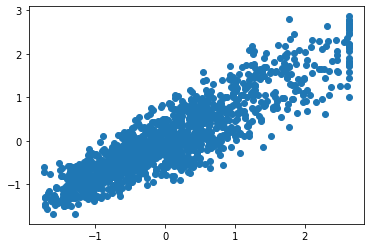

In [109]:
plt.scatter(data_test['AgentBonus'], y_predt)
plt.show()

In [71]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.6) * Intercept + (0.03) * Complaint + (0.02) * Channel_Online + (0.01) * Channel_Third_Party_Partner + (-0.42) * Occupation_Large_Business + (-0.31) * Occupation_Salaried + (-0.4) * Occupation_Small_Business + (0.0) * EducationField_Engineer + (-0.09) * EducationField_Graduate + (-0.13) * EducationField_MBA + (-0.09) * EducationField_Post_Graduate + (-0.0) * EducationField_Under_Graduate + (0.02) * Gender_Male + (-0.34) * Designation_Executive + (-0.32) * Designation_Manager + (-0.18) * Designation_Senior_Manager + (-0.0) * Designation_VP + (0.04) * MaritalStatus_Unmarried + (0.04) * Zone_North + (0.15) * Zone_South + (0.03) * Zone_West + (0.12) * PaymentMethod_Monthly + (0.09) * PaymentMethod_Quarterly + (-0.06) * PaymentMethod_Yearly + (0.13) * Age + (0.14) * CustTenure + (0.04) * ExistingProdType + (0.01) * NumberOfPolicy + (0.1) * MonthlyIncome + (0.08) * ExistingPolicyTenure + (0.6) * SumAssured + (-0.0) * LastMonthCalls + (0.01) * CustCareScore + 

The final Linear Regression equation is

<b>AgentBonus = (0.6) * Intercept + (0.03) * Complaint + (0.02) * Channel_Online + (0.01) * Channel_Third_Party_Partner + (-0.42) * Occupation_Large_Business + (-0.31) * Occupation_Salaried + (-0.4) * Occupation_Small_Business + (0.0) * EducationField_Engineer + (-0.09) * EducationField_Graduate + (-0.13) * EducationField_MBA + (-0.09) * EducationField_Post_Graduate + (-0.0) * EducationField_Under_Graduate + (0.02) * Gender_Male + (-0.34) * Designation_Executive + (-0.32) * Designation_Manager + (-0.18) * Designation_Senior_Manager + (-0.0) * Designation_VP + (0.04) * MaritalStatus_Unmarried + (0.04) * Zone_North + (0.15) * Zone_South + (0.03) * Zone_West + (0.12) * PaymentMethod_Monthly + (0.09) * PaymentMethod_Quarterly + (-0.06) * PaymentMethod_Yearly + (0.13) * Age + (0.14) * CustTenure + (0.04) * ExistingProdType + (0.01) * NumberOfPolicy + (0.1) * MonthlyIncome + (0.08) * ExistingPolicyTenure + (0.6) * SumAssured + (-0.0) * LastMonthCalls + (0.01) * CustCareScore</b>

When SumAssured increases by 1 unit, AgentBonus increases by 0.6 units, keeping all other predictors constant 
,When Age increases by 1 unit, AgentBonus increases by 0.13 units, keeping all other predictors constant
,etcc....

 
  
There are also some negative co-efficient values, for instance, Occupation_Large_Business has its corresponding co-efficient as -0.42. This implies, when the business type is Large Business, the AgentBonus decreases by 0.42 units, keeping all other predictors constant. etc..


### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
dt_model = DecisionTreeRegressor(random_state=1)

In [112]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [113]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                        Imp
SumAssured                     7.282679e-01
Age                            8.701540e-02
CustTenure                     6.597247e-02
MonthlyIncome                  5.066894e-02
ExistingPolicyTenure           1.281017e-02
LastMonthCalls                 9.626351e-03
CustCareScore                  8.180965e-03
NumberOfPolicy                 5.506164e-03
ExistingProdType               3.615086e-03
Designation_VP                 2.573295e-03
MaritalStatus_Unmarried        2.244314e-03
Complaint                      1.938078e-03
EducationField_Graduate        1.859178e-03
Designation_Executive          1.852272e-03
Designation_Manager            1.837419e-03
Channel_Online                 1.821830e-03
Gender_Male                    1.817614e-03
EducationField_Under Graduate  1.678076e-03
Zone_North                     1.598125e-03
Zone_West                      1.594507e-03
Channel_Third Party Partner    1.446140e-03
PaymentMethod_Yearly           1

In [135]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [136]:
dt_model.score(X_train, y_train)

1.0

In [137]:
dt_model.score(X_test, y_test)

0.7148556380980965

In [117]:
# Adjusted R Squared on Training   (1 is better)
1 - (1-dt_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

1.0

In [118]:
# Adjusted R Squared on Test   (1 is better)
1 - (1-dt_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7079587223151329

In [119]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(y_train, ytrain_predict, squared=False)

6.510381524946938e-17

In [120]:
#RMSE test- smaller the value, better
metrics.mean_squared_error(y_test, ytest_predict, squared=False)

0.5336565073329773

In [132]:
ytrain_predict = pd.Series(ytrain_predict)
ytest_predict = pd.Series(ytest_predict)

In [139]:
# Since MAPE 
def MAPE2(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [140]:
# MAPE train - Smaller the value, better
MAPE2(y_train,ytrain_predict)

524.1864120490643

In [141]:
# MAPE test - Smaller the value, better
MAPE2(y_test,ytest_predict)

1073.568998448837

#### Grid Search

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param_grid = {
    'max_depth': [7,10,15],
    'max_features': [8,10,13],
    'min_samples_leaf': [2,5,7],
    'min_samples_split': [15,25,50],
}

rfcl = DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [144]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [7, 10, 15], 'max_features': [8, 10, 13],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [15, 25, 50]})

In [145]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 50}

In [146]:
best_grid = grid_search.best_estimator_

In [147]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [148]:
best_grid.score(X_train, y_train)

0.8508148201090663

In [149]:
best_grid.score(X_test, y_test)

0.7875340487409677

In [150]:
# Adjusted R Squared on Training   (1 is better)
1 - (1-best_grid.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.8492900913462078

In [151]:
# Adjusted R Squared on Test   (1 is better)
1 - (1-best_grid.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7823950385820191

In [154]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(y_train, ytrain_predict, squared=False)

0.3863425265318321

In [155]:
#RMSE test- smaller the value, better
metrics.mean_squared_error(y_test, ytest_predict, squared=False)

0.46065319338047905

In [156]:
# MAPE train - Smaller the value, better
MAPE2(y_train,ytrain_predict)

490.03950301432263

In [157]:
# MAPE test - Smaller the value, better
MAPE2(y_test,ytest_predict)

983.4337166253044

In [108]:
print(pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                    Imp
SumAssured                     0.552842
CustTenure                     0.310670
MonthlyIncome                  0.074083
Age                            0.038149
ExistingPolicyTenure           0.010138
Designation_Senior Manager     0.002526
Designation_VP                 0.001947
NumberOfPolicy                 0.001927
LastMonthCalls                 0.001406
PaymentMethod_Monthly          0.000880
Channel_Third Party Partner    0.000733
Designation_Executive          0.000681
EducationField_Engineer        0.000639
PaymentMethod_Yearly           0.000601
ExistingProdType               0.000563
EducationField_Under Graduate  0.000536
CustCareScore                  0.000391
Occupation_Salaried            0.000372
EducationField_Graduate        0.000344
Channel_Online                 0.000201
Occupation_Small Business      0.000110
MaritalStatus_Unmarried        0.000089
Designation_Manager            0.000087
EducationField_MBA             0.000086


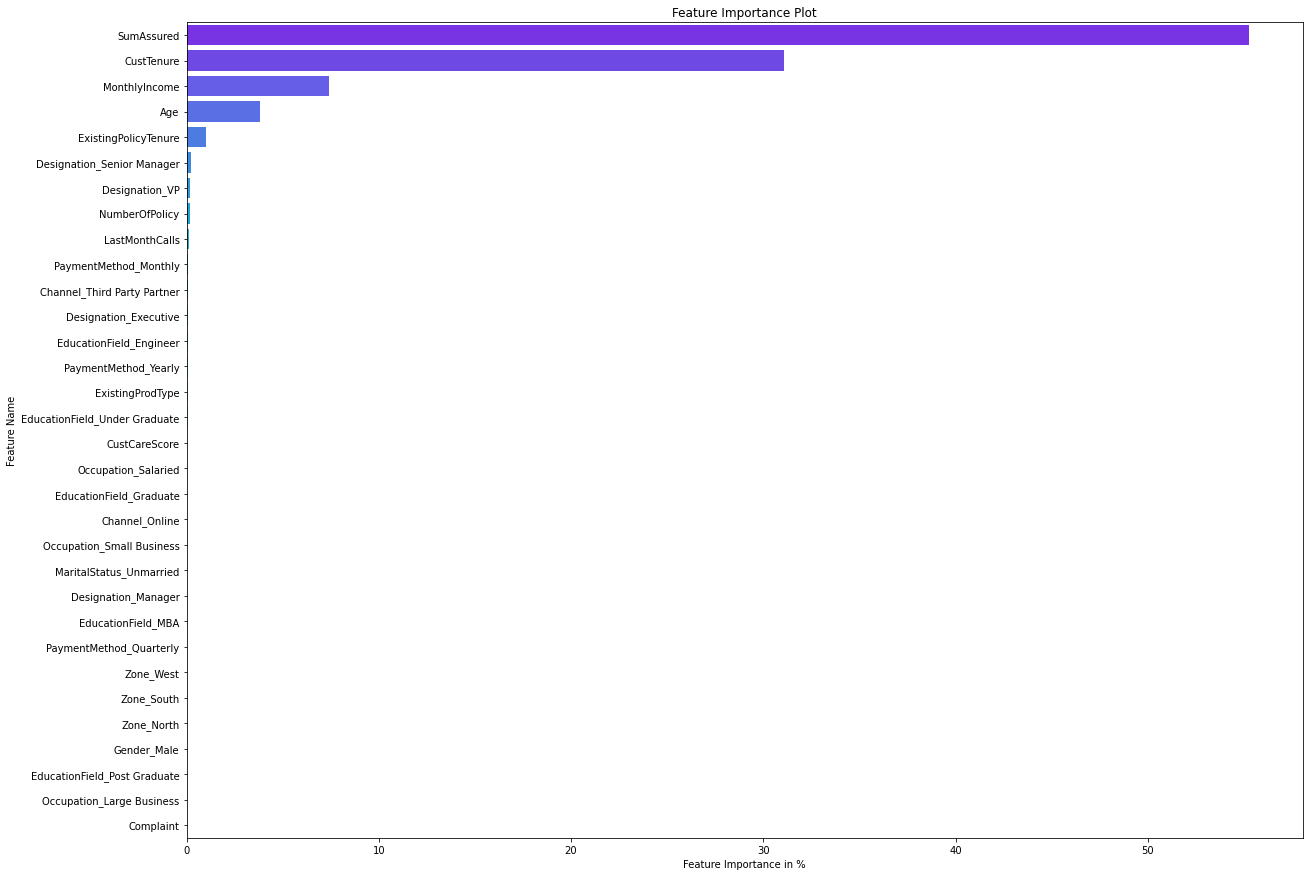

In [114]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
rfcl =RandomForestRegressor(n_estimators=100,random_state=1)

In [160]:
rfcl = rfcl.fit(X_train,y_train)

In [161]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [162]:
rfcl.score(X_train,y_train)

0.9804279512605216

In [163]:
rfcl.score(X_test,y_test)

0.8497134922893905

In [164]:
# Adjusted R Squared on Training   (1 is better)
1 - (1-rfcl.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.9802279175461609

In [165]:
# Adjusted R Squared on Test   (1 is better)
1 - (1-rfcl.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.846078444483843

In [166]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(y_train, ytrain_predict, squared=False)

0.13993547256215788

In [167]:
#RMSE test- smaller the value, better
metrics.mean_squared_error(y_test, ytest_predict, squared=False)

0.3874265787409345

In [168]:
# MAPE train - Smaller the value, better
MAPE2(y_train,ytrain_predict)

502.5315687539636

In [169]:
# MAPE test - Smaller the value, better
MAPE2(y_test,ytest_predict)

964.279300894882

#### Grid search

In [170]:
param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6,8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [171]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [172]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}

In [173]:
best_grid = grid_search.best_estimator_

In [174]:
best_grid

RandomForestRegressor(max_depth=10, max_features=8, min_samples_leaf=5,
                      min_samples_split=50, n_estimators=300, random_state=1)

In [175]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [176]:
best_grid.score(X_train,y_train)

0.8560095870851328

In [177]:
best_grid.score(X_test,y_test)

0.8221405823808248

In [178]:
# Adjusted R Squared on Training   (1 is better)
1 - (1-best_grid.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.8545379507985548

In [179]:
# Adjusted R Squared on Test   (1 is better)
1 - (1-best_grid.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8178386161194389

In [180]:
#RMSE train- smaller the value, better
metrics.mean_squared_error(y_train, ytrain_predict, squared=False)

0.3795565260272401

In [181]:
#RMSE test- smaller the value, better
metrics.mean_squared_error(y_test, ytest_predict, squared=False)

0.4214711459998423

In [182]:
# MAPE train - Smaller the value, better
MAPE2(y_train,ytrain_predict)

448.85057796216483

In [183]:
# MAPE test - Smaller the value, better
MAPE2(y_test,ytest_predict)

888.1873424903665

In [127]:
print(pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                    Imp
SumAssured                     0.487685
Age                            0.145284
CustTenure                     0.137942
MonthlyIncome                  0.121073
ExistingPolicyTenure           0.029009
Designation_Executive          0.027437
Designation_VP                 0.019833
Designation_Manager            0.007454
LastMonthCalls                 0.006471
Designation_Senior Manager     0.005334
ExistingProdType               0.002594
NumberOfPolicy                 0.002216
CustCareScore                  0.001531
PaymentMethod_Yearly           0.000547
Channel_Third Party Partner    0.000520
MaritalStatus_Unmarried        0.000496
Zone_North                     0.000463
Complaint                      0.000446
Gender_Male                    0.000440
Occupation_Salaried            0.000438
Zone_West                      0.000438
EducationField_Under Graduate  0.000357
Channel_Online                 0.000326
Occupation_Small Business      0.000315


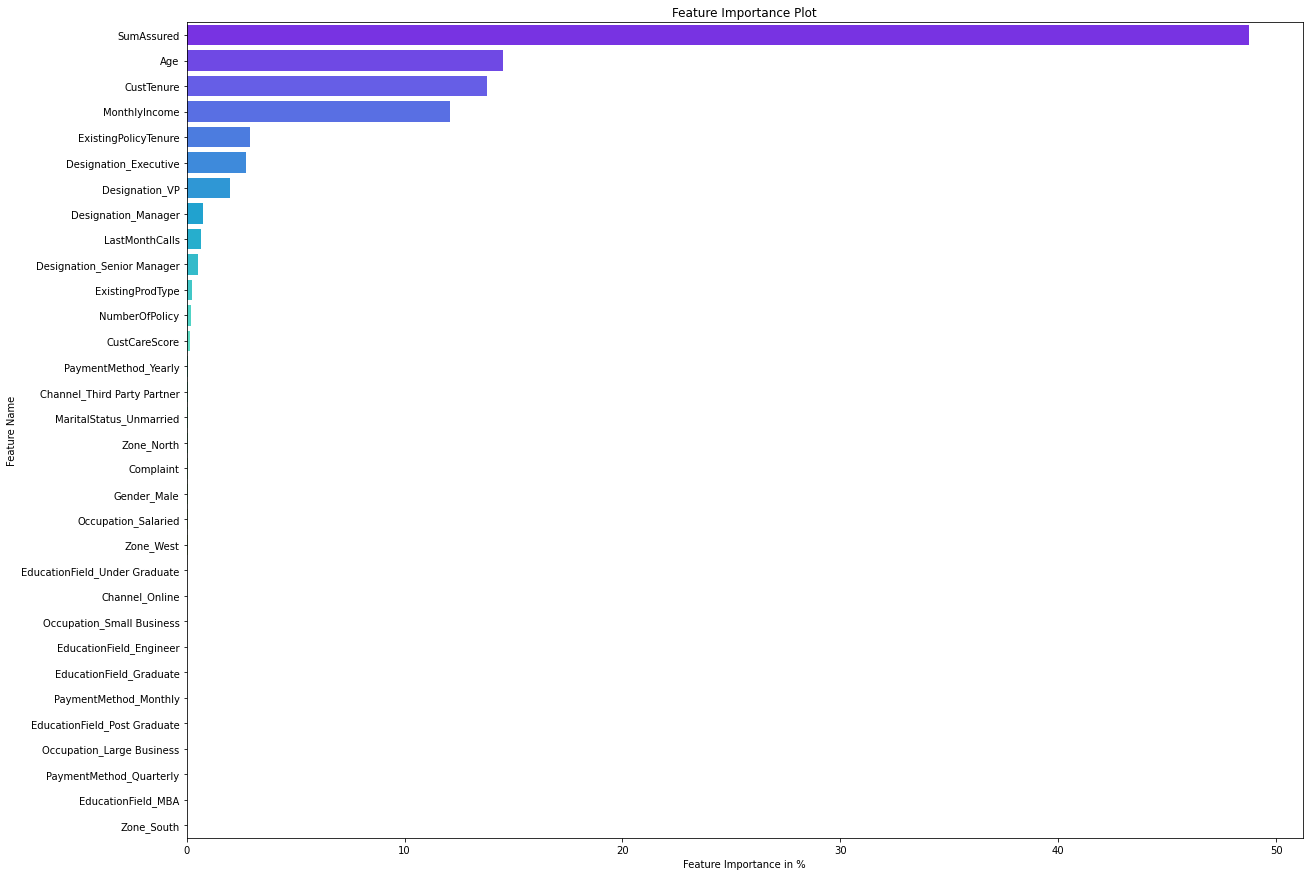

In [126]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()